# This project is for Illini Datathon 2019. Given a dataset of stock prices for a company, I have to predict the future prices. 

Import necessary packages and get a gist of what the dataset lokos like 

In [1]:
import numpy as np 
import pandas as pd

In [2]:
file_path = "SYF.csv"

In [3]:
dataframe = pd.read_csv(file_path)
dataframe[0:5]

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/31/2014,23.000000,24.000000,22.60,23.00,21.73275,56483900.0
1,8/1/2014,22.900000,23.000000,22.67,23.00,21.73275,6458900.0
2,8/4/2014,23.100000,23.129999,22.90,23.00,21.73275,3455900.0
3,8/5/2014,22.990000,23.010000,22.67,23.00,21.73275,4450200.0
4,8/6/2014,22.799999,22.980000,22.67,22.98,21.71385,6993400.0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from datetime import datetime

Import the datetime package and plot the open and close prices 

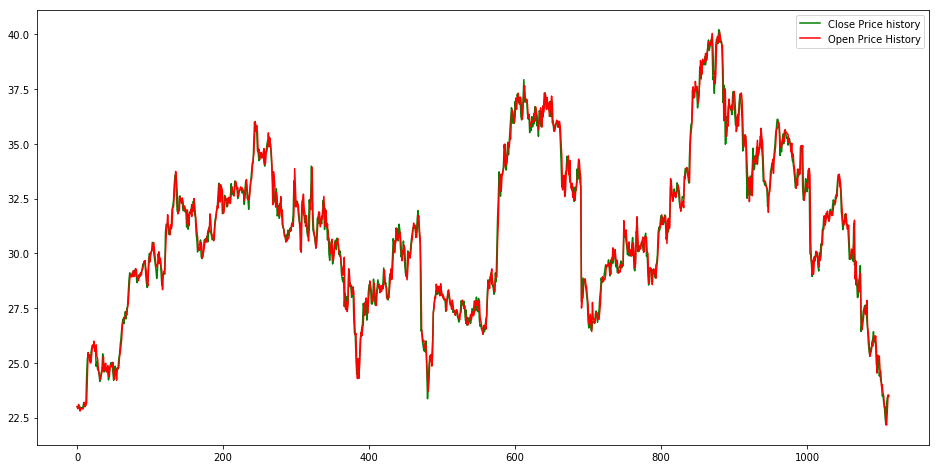

In [6]:
dataframe["Date"] = pd.to_datetime(dataframe.Date)
# dataframe.index = dataframe["Date"]

#plot
plt.figure(figsize=(16,8))
plt.plot(dataframe['Close'], label='Close Price history' , c ='g')
plt.plot(dataframe['Open'] , label = "Open Price History" , c ='r',  )
plt.legend()

Check the missing values and drop if necessary 

In [7]:
dataframe.isna().sum()

Date         25
Open         25
High         25
Low          25
Close        25
Adj Close    25
Volume       25
dtype: int64

In [8]:
dataframe = dataframe.dropna(axis=0)
dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-31,23.000000,24.000000,22.600000,23.000000,21.732750,56483900.0
1,2014-08-01,22.900000,23.000000,22.670000,23.000000,21.732750,6458900.0
2,2014-08-04,23.100000,23.129999,22.900000,23.000000,21.732750,3455900.0
3,2014-08-05,22.990000,23.010000,22.670000,23.000000,21.732750,4450200.0
4,2014-08-06,22.799999,22.980000,22.670000,22.980000,21.713850,6993400.0
5,2014-08-07,22.889999,23.000000,22.799999,22.930000,21.666607,3186900.0
6,2014-08-08,22.930000,23.030001,22.799999,22.950001,21.685505,2855000.0
7,2014-08-11,22.900000,22.930000,22.799999,22.930000,21.666607,1767500.0
8,2014-08-12,22.889999,23.000000,22.830000,23.000000,21.732750,1549700.0
9,2014-08-13,23.000000,23.230000,22.879999,23.180000,21.902832,1659100.0


In [9]:
index = [ i for i in range(len(dataframe))]
df = pd.DataFrame(index = index, columns = [["Date", "Close"]])

Make a dataframe with just date and target column.
The first strategy would be to predict the prices of future based on the average of everything until then. 
Looking at the graph of open/close, a rolling average might not be the best method, but I can't be sure before trying it. 

In [10]:
df["Date"] = pd.to_datetime(dataframe.Date)
df["Close"] = dataframe["Close"]

In [11]:
train = df.iloc[0:int(0.8*len(df)), :]
test = df.iloc[int(0.8*len(df)) : , :]
train.shape , test.shape

((890, 2), (223, 2))

In [12]:
predictions = [] 
for i in range(len(test)):
    roll_ave = train['Close'][len(train) - len(test) + i: ].sum() + np.sum(predictions)
    average = roll_ave/len(test)
    predictions.append(average)

In [13]:
test["Predictions"] = 0
test["Predictions"] = predictions

C:\Users\llaho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\llaho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


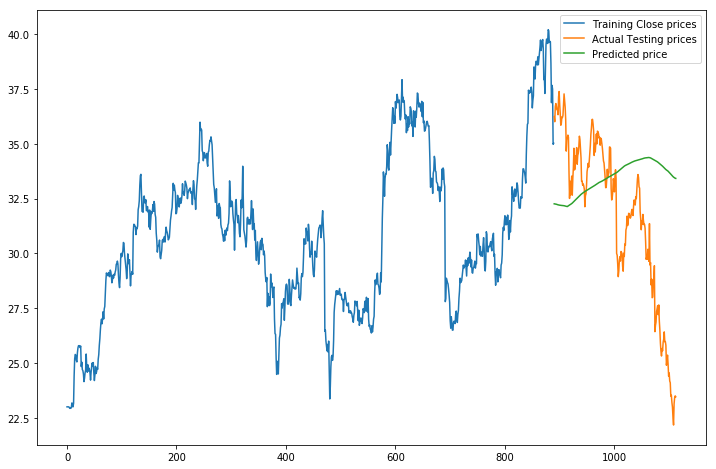

In [14]:
plt.figure(figsize=(12,8))
plt.plot(train["Close"] , label = "Training Close prices")
plt.plot(test["Close"], label = "Actual Testing prices")
plt.plot(test["Predictions"] , label = "Predicted price")
plt.legend( loc = "upper right")
plt.show()


As it can be seen, it's not a very good model. The average rolling method fails to account for sharp rises/falls and I will need a better model. 
Now I'll try to use Linear Regression to see if that may be a better fit for this dataset. 

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
dataframe[0:5]
X = dataframe[["Open", "High" , "Low" , "Adj Close", "Volume"]]
y = dataframe[["Close"]]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((890, 5), (223, 5), (890, 1), (223, 1))

For using LinearRegresison, the order of operation is to first instantiate the model, fit the training data, and use the model to predict prices 

C:\Users\llaho\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\llaho\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


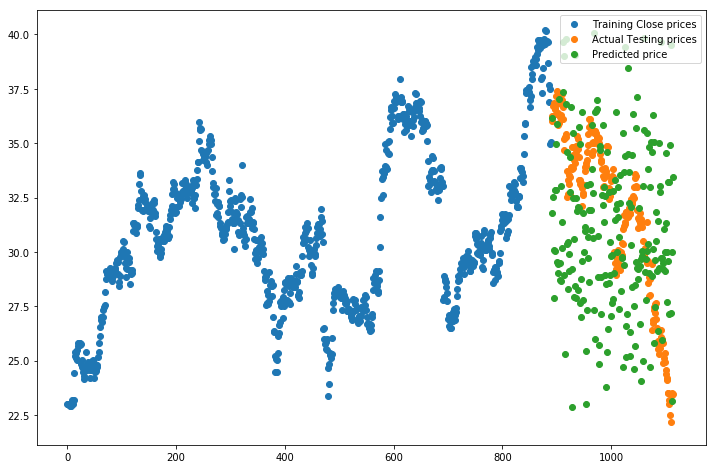

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train,y_train)
predict = model.predict(X_test)

test["Predictions"] = 0 
test["Predictions"] = predict 

plt.figure(figsize=(12,8))
plt.scatter([i for i in range(len(train["Close"]))], train["Close"] , label = "Training Close prices")
plt.scatter([i for i in range(891,1114)], test["Close"], label = "Actual Testing prices")
plt.scatter([i for i in range(891,1114)], test["Predictions"], label = "Predicted price")
plt.legend( loc = "upper right")
plt.show()


The Linear regression is not that great at predicting the price as we can see how scattered the points are. I'll try using a Polynomial Regression to see if that works. 

C:\Users\llaho\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\llaho\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


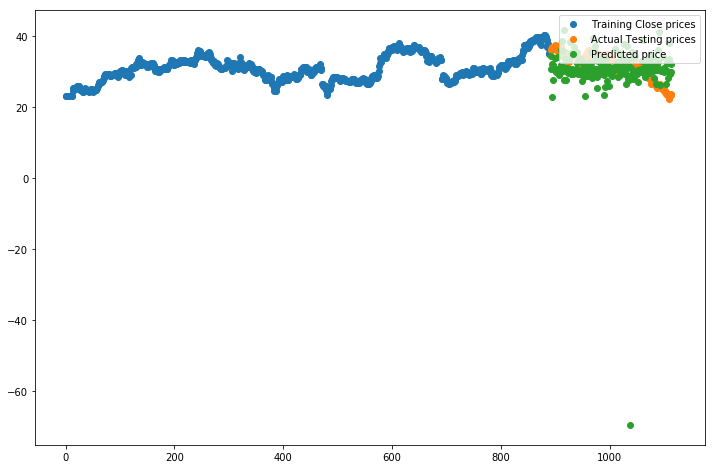

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)
polynomial_features.fit(x_poly,y_train)

x_test = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)
predictions = model.predict(x_test)

x_axis = [i for i in range(len(predictions))]
test["Predictions"] = 0 
test[ "Predictions"]= predictions
plt.figure(figsize=(12,8))


plt.scatter([i for i in range(len(train["Close"]))], train["Close"] , label = "Training Close prices")
plt.scatter([i for i in range(891,1114)], test["Close"], label = "Actual Testing prices")
plt.scatter([i for i in range(891,1114)], test["Predictions"], label = "Predicted price")
plt.legend( loc = "upper right")
plt.show()




The polynomial function does a little better than the Linear Regression but there is still room for improvement. I'll try a bit more complex method - KNearestNeighbors. 

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.grid_search import GridSearchCV


C:\Users\llaho\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\llaho\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__leaf_size', 'estimator__metric', 'estimator__metric_params', 'estimator__n_jobs', 'estimator__n_neighbors', 'estimator__p', 'estimator__weights', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'scoring', 'verbose'])


C:\Users\llaho\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\llaho\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


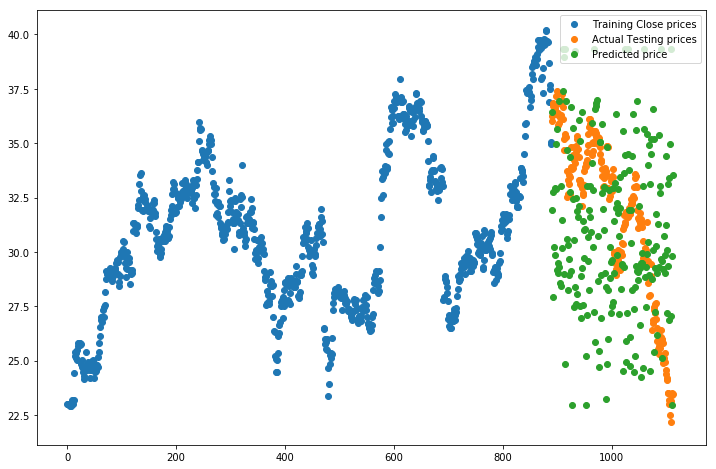

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
x_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
neighbors_list = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
# neighbors_list = {'kernel':['rbf']}
# parameters = {
#     "estimator__C": [1,2,4,8],
#     "estimator__kernel": ["poly","rbf"],
#     "estimator__degree":[1, 2, 3, 4],
# }

# parameters  = {"estimator__alpha": [10**-5, 10**-3, 10**-1, 10**1, 10**2]}


knn = KNeighborsRegressor()
model = GridSearchCV( knn, param_grid = neighbors_list, cv=20)
model.fit(x_train_scaled, y_train)
predictions = model.predict(x_test_scaled)
test["Predictions"] = 0
test["Predictions"] = predictions

print(model.get_params().keys())


plt.figure(figsize=(12,8))
plt.scatter([i for i in range(len(train["Close"]))], train["Close"] , label = "Training Close prices")
plt.scatter([i for i in range(890,1113)], test["Close"], label = "Actual Testing prices")
plt.scatter([i for i in range(890,1113)], test["Predictions"], label = "Predicted price")
plt.legend(loc = "upper right")
# plt.show()


Overall, I can see that Regression did not work too well. I'm going to try using time forecasting methods to see if they do any better. 

In [61]:
from fbprophet import Prophet

In [83]:
train = dataframe.iloc[0:int(0.8*len(dataframe)), :]
test = dataframe.iloc[int(0.8*len(dataframe)): , :]
print(train[0:4])

        Date   Open       High    Low  Close  Adj Close      Volume
0 2014-07-31  23.00  24.000000  22.60   23.0   21.73275  56483900.0
1 2014-08-01  22.90  23.000000  22.67   23.0   21.73275   6458900.0
2 2014-08-04  23.10  23.129999  22.90   23.0   21.73275   3455900.0
3 2014-08-05  22.99  23.010000  22.67   23.0   21.73275   4450200.0


In [84]:
model = Prophet()
train = train[["Date","Close"]]
train.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
train[0:4]

,ds,y
0,2014-07-31,23.0
1,2014-08-01,23.0
2,2014-08-04,23.0
3,2014-08-05,23.0


In [85]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\llaho\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [87]:
close_prices = model.make_future_dataframe(periods=len(test))
forecast = model.predict(close_prices)

In [88]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-07-31,25.185278,23.313426,26.003887,25.185278,25.185278,-0.536539,-0.536539,-0.536539,0.498367,0.498367,0.498367,-1.034906,-1.034906,-1.034906,0.0,0.0,0.0,24.648739
1,2014-08-01,25.204844,23.184595,26.046816,25.204844,25.204844,-0.640229,-0.640229,-0.640229,0.481760,0.481760,0.481760,-1.121989,-1.121989,-1.121989,0.0,0.0,0.0,24.564615
2,2014-08-04,25.263539,22.914511,25.886942,25.263539,25.263539,-0.867989,-0.867989,-0.867989,0.486406,0.486406,0.486406,-1.354395,-1.354395,-1.354395,0.0,0.0,0.0,24.395550
3,2014-08-05,25.283104,22.858227,25.719601,25.283104,25.283104,-0.948461,-0.948461,-0.948461,0.468881,0.468881,0.468881,-1.417341,-1.417341,-1.417341,0.0,0.0,0.0,24.334644
4,2014-08-06,25.302670,22.914217,25.863697,25.302670,25.302670,-0.953482,-0.953482,-0.953482,0.517725,0.517725,0.517725,-1.471206,-1.471206,-1.471206,0.0,0.0,0.0,24.349188
5,2014-08-07,25.322235,22.852419,25.677069,25.322235,25.322235,-1.016962,-1.016962,-1.016962,0.498367,0.498367,0.498367,-1.515329,-1.515329,-1.515329,0.0,0.0,0.0,24.305272
6,2014-08-08,25.341800,22.831232,25.687503,25.341800,25.341800,-1.067596,-1.067596,-1.067596,0.481760,0.481760,0.481760,-1.549356,-1.549356,-1.549356,0.0,0.0,0.0,24.274204
7,2014-08-11,25.400496,22.906741,25.788435,25.400496,25.400496,-1.105500,-1.105500,-1.105500,0.486406,0.486406,0.486406,-1.591906,-1.591906,-1.591906,0.0,0.0,0.0,24.294995
8,2014-08-12,25.420061,22.874513,25.677194,25.420061,25.420061,-1.119167,-1.119167,-1.119167,0.468881,0.468881,0.468881,-1.588048,-1.588048,-1.588048,0.0,0.0,0.0,24.300894
9,2014-08-13,25.439626,22.931332,25.777439,25.439626,25.439626,-1.058998,-1.058998,-1.058998,0.517725,0.517725,0.517725,-1.576722,-1.576722,-1.576722,0.0,0.0,0.0,24.380628


In [98]:
forecast_test = forecast['yhat'][890:]
test['Predictions'] = 0
test['Predictions'] = forecast_test.values

C:\Users\llaho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\llaho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


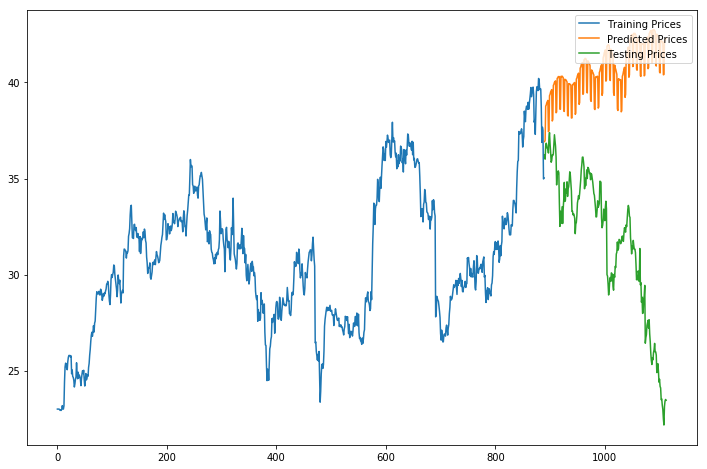

In [107]:
plt.figure(figsize=(12,8))
plt.plot(train['y'], label = "Training Prices")
plt.plot(test["Predictions"] , label = "Predicted Prices")
plt.plot(test["Close"], label = "Testing Prices")
plt.legend(loc = 'upper right')

This time serie analysis picks up the wrong curve and instead of going downwards, goes upwards instead. But the curve is much better and if there was more data, I think the model would have picked the curve better giving more accurate results. 